<a href="https://colab.research.google.com/github/archie-sinha/Evolutionary-Computing/blob/main/EC_3_8_Queens_Problem_using_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Archisha Sinha**
##Domain: Evolutionary Computing
##Topic: N-Queens Problem (Backtracking Method and Genetic Algorithm)

**TASK 1:**
N queens’ problem using Backtracking Method



The 4-Queens problem is a classic puzzle in chess and computer science that involves placing four queens on a 4x4 chessboard in such a way that no two queens threaten each other.

- *Objective:* The goal is to place four queens on a 4x4 chessboard in such a way that no two queens share the same row, column, or diagonal.

- *Constraint:* Queens can move horizontally, vertically, and diagonally. The challenge is to find a placement that satisfies the non-attack condition for all queens.

- *Complexity:* While the 4-Queens problem is relatively small, it is a simplified version of the N-Queens problem, which generalizes the puzzle to an N x N chessboard. The N-Queens problem is a well-known combinatorial problem with a much larger solution space.


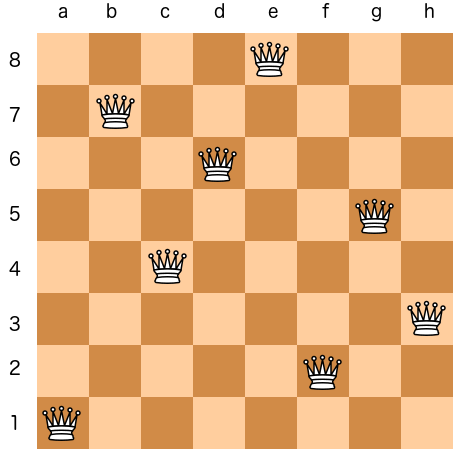

Reference Image: https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fnerd-for-tech%2Fgenetic-algorithm-8-queens-problem-b01730e673fd&psig=AOvVaw26-18GPqE8h9ClF68u1gOt&ust=1715405815343000&source=images&cd=vfe&opi=89978449&ved=2ahUKEwitjbbjroKGAxVeT2wGHcAHA8wQjRx6BAgAEBY

In [ ]:
def is_safe(board, row, col):
    # Check if there is no queen in the same row or diagonal
    for i in range(row):
        if board[i] == col or \
           board[i] - i == col - row or \
           board[i] + i == col + row:
            return False
    return True

In [ ]:
def solve_queens(board, row):
    n = len(board)
    if row == n:
        # All queens are placed, solution found
        print(board)
    else:
        for col in range(n):
            if is_safe(board, row, col):
                # Place queen and move to the next row
                board[row] = col
                solve_queens(board, row + 1)

In [ ]:
# Initialize an empty chessboard (represented as a list)
board = [-1, -1, -1, -1]

In [ ]:
# Start solving from the first row
solve_queens(board, 0)

[1, 3, 0, 2]
[2, 0, 3, 1]


**TASK 2:**
N queens’ problem using Backtracking Algorithm

In [ ]:
global N
N = 4

In [ ]:
def printSolution(board):
    for i in range(N):
        for j in range(N):
            if board[i][j] == 1:
                print("Q",end=" ")
            else:
                print(".",end=" ")
        print()

In [ ]:
# A utility function to check if a queen can be placed on board[row][col].
# Note that this function is called when "col" queens are already placed in columns from 0 to col -1.
# So we need to check only left side for attacking queens
def isSafe(board, row, col):

    # Check this row on left side
    for i in range(col):
        if board[row][i] == 1:
            return False

    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1),
                    range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check lower diagonal on left side
    for i, j in zip(range(row, N, 1),
                    range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True

In [ ]:
def solveNQUtil(board, col):

    # Base case: If all queens are placed then return true
    if col >= N:
        return True

    # Consider this column and try placing this queen in all rows one by one
    for i in range(N):

        if isSafe(board, i, col):

            # Place this queen in board[i][col]
            board[i][col] = 1

            # Recur to place rest of the queens
            if solveNQUtil(board, col + 1) == True:
                return True

            # If placing queen in board[i][col] doesn't lead to a solution, then queen from board[i][col]
            board[i][col] = 0

    # If the queen can not be placed in any row in this column col then return false
    return False

In [ ]:
# This function solves the N Queen problem using Backtracking.
# It mainly uses solveNQUtil() to solve the problem.
# It returns false if queens cannot be placed, otherwise return true and placement of queens in the form of 1s.
# note that there may be more than one solutions, this function prints one of the feasible solutions.
def solveNQ():
    board = [[0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]]

    if solveNQUtil(board, 0) == False:
        print("Solution does not exist")
        return False

    printSolution(board)
    return True


# Driver Code
if __name__ == '__main__':
    solveNQ()

. . Q . 
Q . . . 
. . . Q 
. Q . . 


GENETIC ALGORITHM

In [ ]:
import random

# Genetic Algorithm parameters
POPULATION_SIZE = 50
MUTATION_RATE = 0.1
MAX_GENERATIONS = 100

# Generate a random board state
def generate_board_state():
    board_state = [random.randint(0, 7) for _ in range(8)]
    return board_state

# Calculate the fitness of a board state
def calculate_fitness(board_state):
    conflicts = 0
    for i in range(8):
        for j in range(i + 1, 8):
            if board_state[i] == board_state[j] or abs(board_state[i] - board_state[j]) == j - i:
                conflicts += 1
    return 28 - conflicts  # Max fitness = 28 (no conflicts)

# Select parents for crossover using tournament selection
def tournament_selection(population):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda x: x[1])

# Crossover operation (single-point crossover)
def crossover(parent1, parent2):
    crossover_point = random.randint(1, 7)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

# Mutation operation (swap two positions)
def mutate(board_state):
    pos1, pos2 = random.sample(range(8), 2)
    board_state[pos1], board_state[pos2] = board_state[pos2], board_state[pos1]
    return board_state

# Generate the initial population
population = [(generate_board_state(), 0) for _ in range(POPULATION_SIZE)]

# Main Genetic Algorithm loop
for generation in range(MAX_GENERATIONS):
    # Calculate fitness for each board state
    population = [(board_state, calculate_fitness(board_state)) for board_state, _ in population]

    # Check if solution is found
    best_board_state = max(population, key=lambda x: x[1])[0]
    if calculate_fitness(best_board_state) == 28:
        print("Solution found in generation", generation)
        break

    # Create the next generation
    new_population = []

    # Elitism: Keep the best board state from the previous generation
    new_population.append(max(population, key=lambda x: x[1]))

    # Perform selection, crossover, and mutation
    while len(new_population) < POPULATION_SIZE:
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child = crossover(parent1[0], parent2[0])
        if random.random() < MUTATION_RATE:
            child = mutate(child)
        new_population.append((child, 0))

    # Update the population
    population = new_population

# Print the best solution
print("Best solution:", best_board_state)

Best solution: [6, 2, 0, 6, 1, 7, 5, 1]


**TASK 3**: Formulate observations

Backtracking Solution (4-Queens Problem):

- Search Space Exploration: Exhaustively explores all possibilities.
- Completeness: Guaranteed to find all solutions.
- Time Complexity: Exponential (O(N!)) due to systematic exploration.
- Space Complexity: Linear (O(N)) as it uses an array for the board.

Genetic Algorithm Solution (N-Queens Problem):

- Initialization and Operations: Utilizes genetic operations for evolution.
- Convergence and Diversity: Tends to converge, maintains diversity.
- Stochastic Nature: Involves randomness for exploration.
- Time Complexity: Variable, generally lower than exponential.
- Space Complexity: Quadratic (O(N^2)) due to the 2D array representation.

TASK 4: Checking Total Execution Time for Backtracking Approach

In [ ]:
import time

# Measure time taken for execution
start_time = time.time()
solve_queens(board, 0)
end_time = time.time()

print("Time taken for Backtracking Solution: ", end_time - start_time, " seconds")


[1, 3, 0, 2]
[2, 0, 3, 1]
Time taken for Backtracking Solution:  0.0017964839935302734  seconds


TASK 4: Checking Total Execution Time for Genetic Algorithm Approach

In [ ]:
import time

# Measure time taken for execution
start_time = time.time()
solveNQ()
end_time = time.time()

print("Time taken for Genetic Algorithm Solution: ", end_time - start_time, " seconds")


. . Q . 
Q . . . 
. . . Q 
. Q . . 
Time taken for Genetic Algorithm Solution:  0.0006401538848876953  seconds


In [ ]:
import random
import time

# ... (existing code)

# Record the start time
start_time = time.time()

# Main Genetic Algorithm loop
for generation in range(MAX_GENERATIONS):
    # ... (existing code)

# Record the end time
end_time = time.time()

# Calculate and print the time taken
time_taken = end_time - start_time
print("Time taken to execute Genetic Algorithm:", time_taken, " seconds")

# Print the best solution
print("Best solution:", best_board_state)

IndentationError: expected an indented block after 'for' statement on line 10 (<ipython-input-27-e896d3582f9d>, line 14)